In [1]:
import numpy as np
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(
        mnist["data"], 
        mnist["target"],
        train_size=0.80, 
        random_state=1234)

/Users/shabari/tensorflow/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
X_train.shape

(56000, 784)

In [5]:
y_train.shape

(56000,)

In [6]:
y_train_even = (y_train %2 == 0)
# for i in y_train:
#     if i % 2 == 0:
#         y_train_even.append(True)
#     else:
#         y_train_even.append(False)
        
# y_train_even = np.array(y_train_even)
# y_test_5 = (y_test == 5)
y_test_even = (y_test %2 ==0)
# for i in y_train:
#     if i % 2 == 0:
#         y_test_even.append(True)
#     else:
#         y_test_even.append(False)

# y_test_even = np.array(y_test_even)

In [40]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_even)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

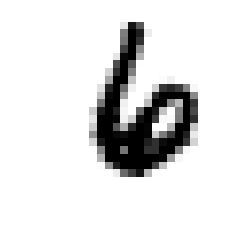

array([ True])

In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = X_train[36000]
def plot_digit(some_digit):
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image,cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show()

plot_digit(some_digit)
sgd_clf.predict([some_digit])

In [42]:
y_pred = sgd_clf.predict(X_test)

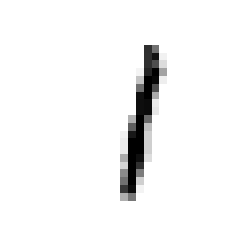

array([False])

In [43]:
some_digit = X_train[36005]
plot_digit(some_digit)
sgd_clf.predict([some_digit])

In [44]:
from sklearn.metrics import precision_score, recall_score,accuracy_score
precision_score(y_test_even, y_pred)

0.8528503229429936

In [45]:
recall_score(y_test_even, y_pred)

0.8897026512377325

In [46]:
accuracy_score(y_test_even, y_pred)

0.8713571428571428

## KNeighborsClassifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_even)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

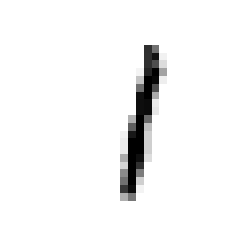

array([False])

In [29]:
#DO_NOT_RUN
plot_digit(some_digit)
knn_clf.predict([some_digit])

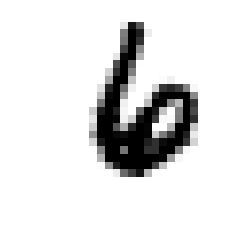

array([ True])

In [49]:
some_digit = X_train[36000]
plot_digit(some_digit)
knn_clf.predict([some_digit])

In [50]:
y_pred = knn_clf.predict(X_test[:100,:])

In [51]:
precision_score(y_test_even[:100], y_pred)

0.9782608695652174

In [52]:
accuracy_score(y_test_even[:100], y_pred)

0.99